In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
import matplotlib as mpl

plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.viridis(np.linspace(0,1,12)))
# plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab10.colors)

# runstr='Dry'
# dftab=pd.read_pickle('dfs/df_run_02_dry_delta_tab.pkl')
# df=pd.read_pickle('dfs/df_run_02_dry.pkl')

runstr='Wet'
dftab=pd.read_pickle('dfs/df_run_02_land_delta_tab.pkl')
# df=pd.read_pickle('dfs/df_run_02_land.pkl')

tmax=12
tmin=0
dftab=dftab.query('t - tlf < ' + str(tmax) +'/24.')
dftab=dftab.query('t - tlf > ' + str(tmin) +'/24.')

tlfs=df.tlf.unique()
yv='P'
yvlab='P (hPa)'

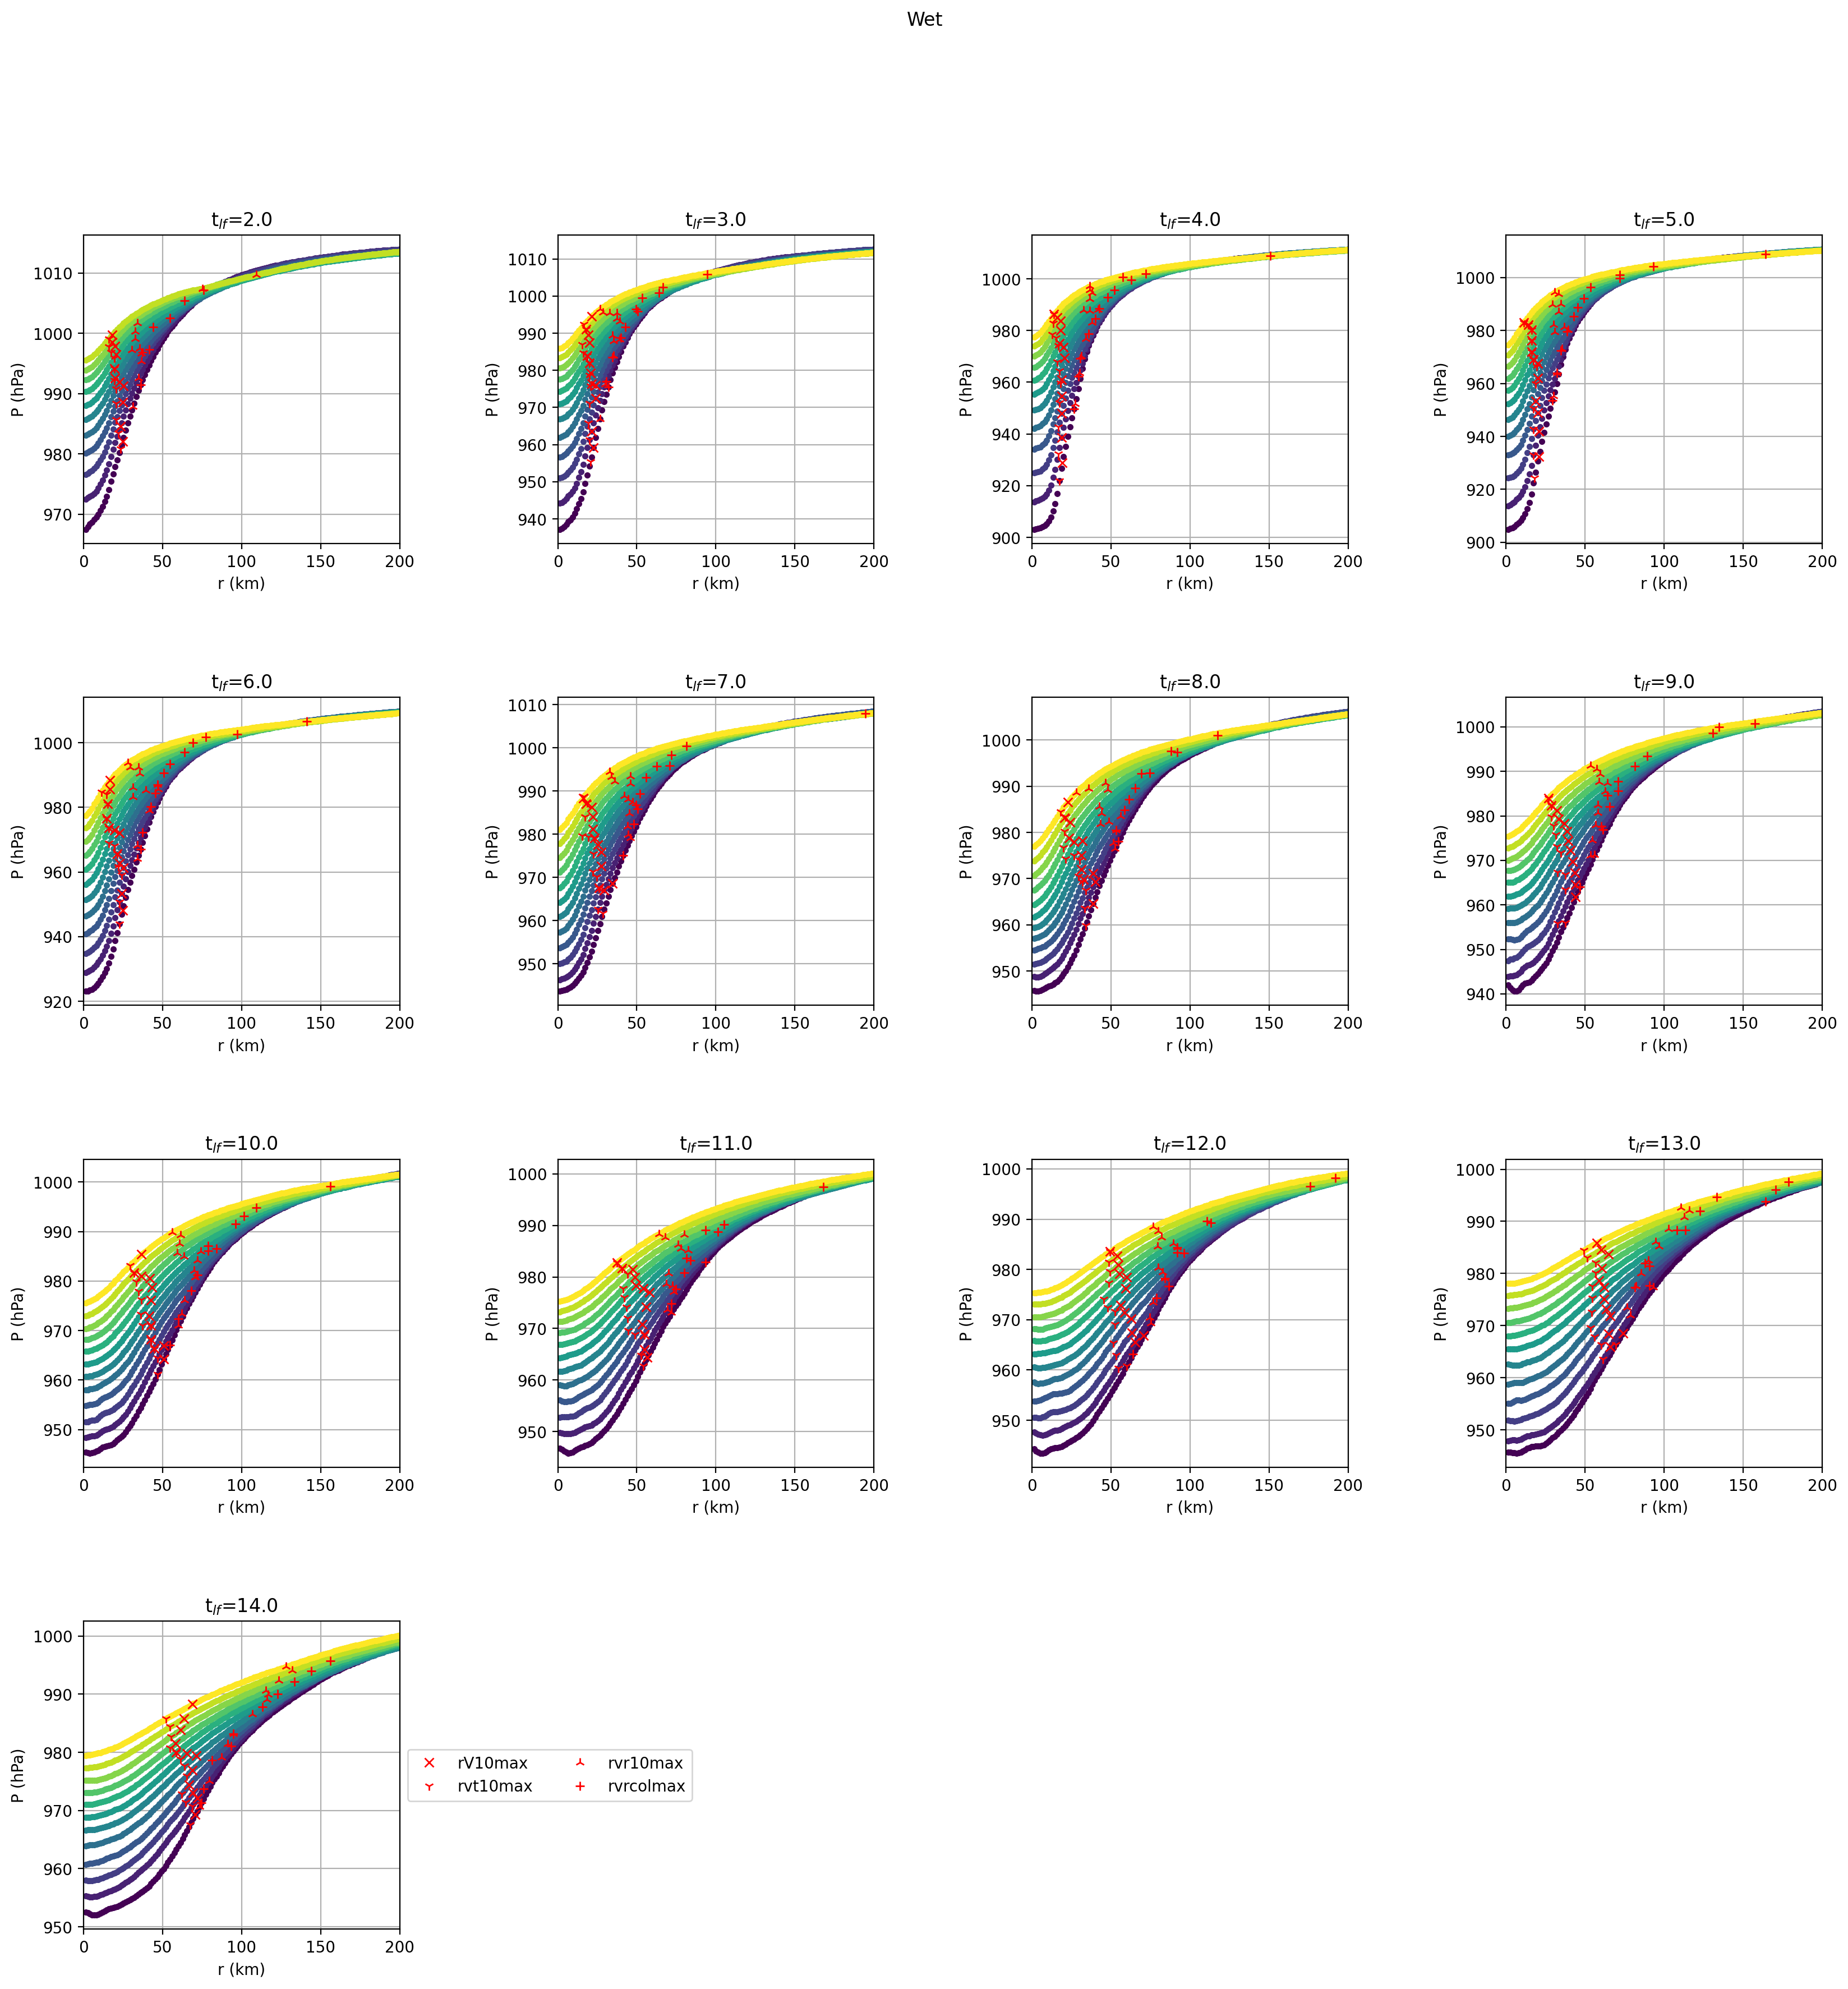

In [139]:
fig,axs=plt.subplots(4,4,sharex=False,dpi=200,figsize=(20,20))
plt.subplots_adjust(hspace=0.5,wspace=0.5)
for i in range(len(tlfs),len(axs.flat)):
    axs.flat[i].axis('off')

rows=[]
for ax,tlf in zip(axs.flat,tlfs):
    dftab_tlf=dftab[dftab.tlf.eq(tlf)]
    ts=dftab_tlf.t.unique()
    for t in ts:
        dftab_t=dftab_tlf[dftab_tlf.t.eq(t)]
        P=dftab_t.P
        P=dftab_t[yv]
        r=dftab_t.r
        ax.plot(r,P,'.')
    for t in ts:
        dftab_t=dftab_tlf[dftab_tlf.t.eq(t)]
        P=dftab_t.P
        P=dftab_t[yv]
        r=dftab_t.r
        Pmin=dftab_t.Pmin.head(1)
        rmax=dftab_t.rV10max.head(1)
        rvtmax=dftab_t.rvt10max.head(1)
        rvrmax=dftab_t.rvr10max.head(1)
        rvrcolmax=dftab_t.rvrcolmax.head(1)
        
        Prmax=np.interp(rmax,r,P)
        Prvtmax=np.interp(rvtmax,r,P)
        Prvrmax=np.interp(rvrmax,r,P)
        Prvrcolmax=np.interp(rvrcolmax,r,P)
        
        h1=ax.plot(rmax,Prmax,'xr')
        h2=ax.plot(rvtmax,Prvtmax,'1r')
        h3=ax.plot(rvrmax,Prvrmax,'2r')
        h4=ax.plot(rvrcolmax,Prvrcolmax,'+r')
        
        rows.append({'tlf':tlf, 'Prmax':Prmax, 'Pmin':Pmin,'rV10max':rmax,'rvt10max':rvtmax,'rvr10max':rvrmax,'rvrcolmax':rvrcolmax})
    ax.set_title('t$_{lf}$='+str(tlf))
    ax.set_xlabel('r (km)')
    ax.set_ylabel(yvlab)
    ax.grid(True)
    ax.set_xlim((0,200))
plt.suptitle(runstr);  
hs=(h1[0],h2[0],h3[0],h4[0])
ax.legend(hs,('rV10max','rvt10max','rvr10max','rvrcolmax'),loc='center left',\
          bbox_to_anchor=(1, 0.5),ncol=2)

df=pd.DataFrame(rows)

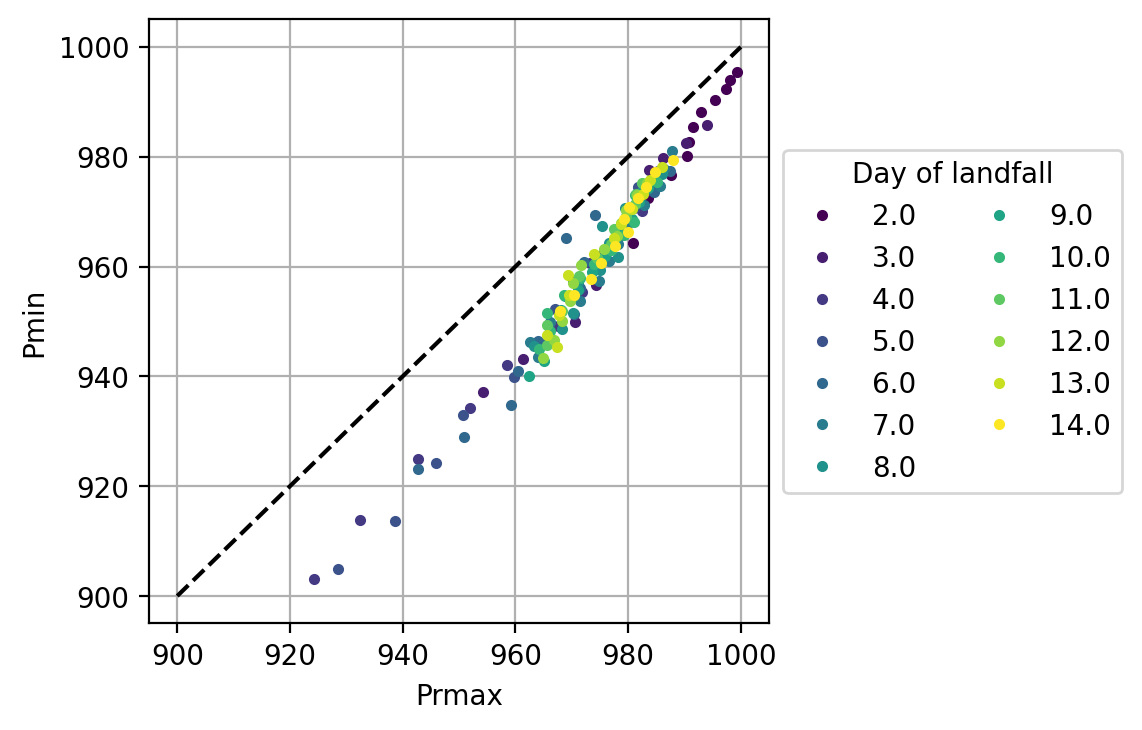

In [75]:
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.viridis(np.linspace(0,1,13)))
fig,ax=plt.subplots(1,1,sharex=False,dpi=200,figsize=(4,4))
tlfs=df.tlf.unique()
for tlf in tlfs:
    dfl=df[df.tlf.eq(tlf)]
    ax.plot(dfl.Prmax,dfl.Pmin,'.')
ax.grid(True)
ax.set_xlabel('Prmax')
ax.set_ylabel('Pmin')
ax.legend(tlfs,loc='center left',\
          bbox_to_anchor=(1, 0.5),ncol=2,title='Day of landfall')
ax.plot((900,1000),(900,1000),'k--')

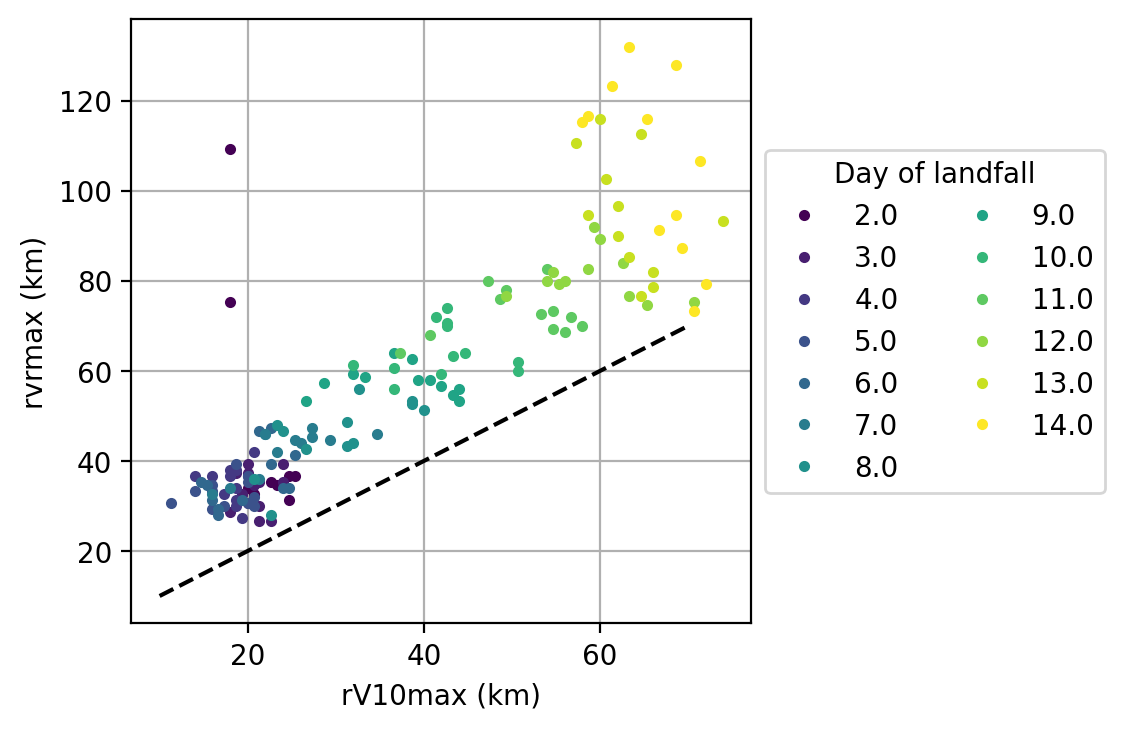

In [143]:
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.viridis(np.linspace(0,1,13)))
fig,ax=plt.subplots(1,1,sharex=False,dpi=200,figsize=(4,4))
tlfs=df.tlf.unique()
for tlf in tlfs:
    dfl=df[df.tlf.eq(tlf)]
    ax.plot(dfl.rV10max,dfl.rvr10max,'.')
ax.grid(True)
ax.set_xlabel('rV10max (km)')
ax.set_ylabel('rvrmax (km)')
ax.legend(tlfs,loc='center left',\
          bbox_to_anchor=(1, 0.5),ncol=2,title='Day of landfall')
ax.plot((10,70),(10,70),'k--')

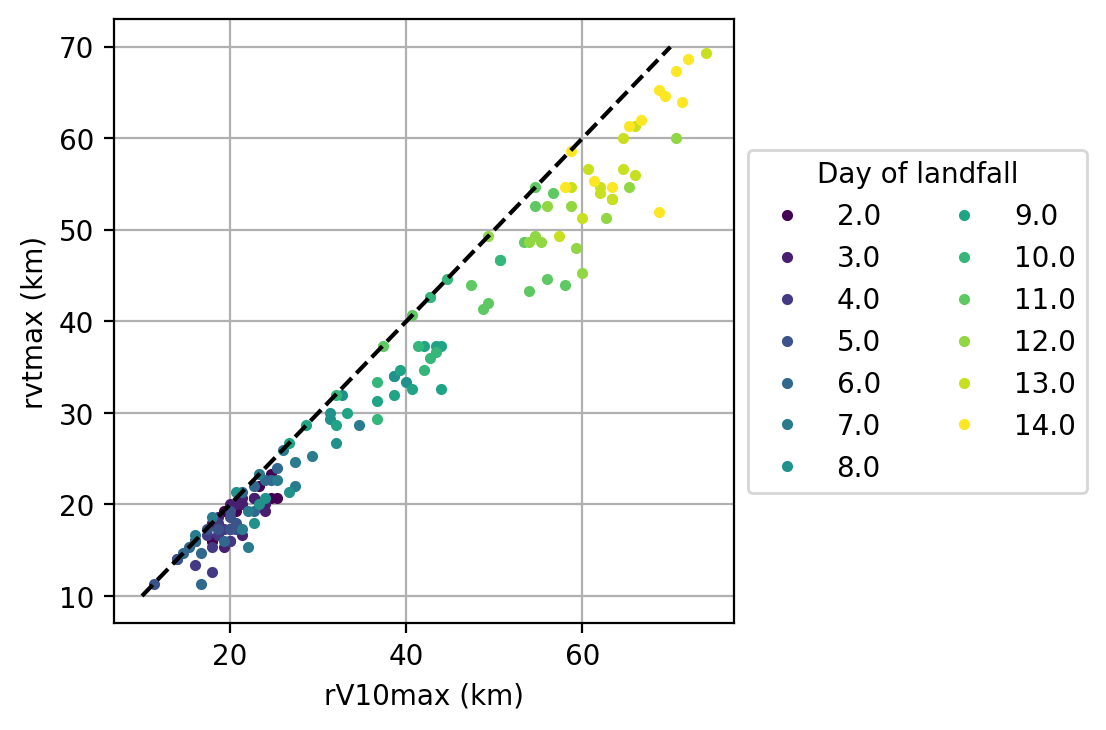

In [144]:
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.viridis(np.linspace(0,1,13)))
fig,ax=plt.subplots(1,1,sharex=False,dpi=200,figsize=(4,4))
tlfs=df.tlf.unique()
for tlf in tlfs:
    dfl=df[df.tlf.eq(tlf)]
    ax.plot(dfl.rV10max,dfl.rvt10max,'.')
ax.grid(True)
ax.set_xlabel('rV10max (km)')
ax.set_ylabel('rvtmax (km)')
ax.legend(tlfs,loc='center left',\
          bbox_to_anchor=(1, 0.5),ncol=2,title='Day of landfall')
ax.plot((10,70),(10,70),'k--')

(-10.0, 300.0)

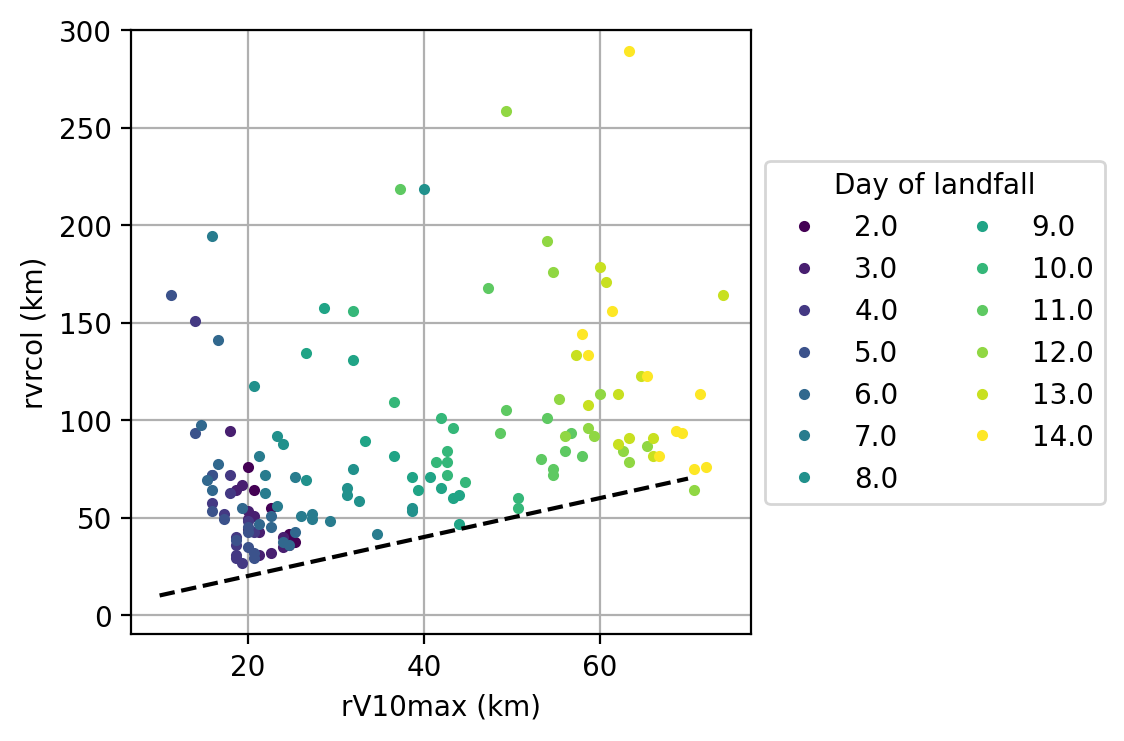

In [146]:
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.viridis(np.linspace(0,1,13)))
fig,ax=plt.subplots(1,1,sharex=False,dpi=200,figsize=(4,4))
tlfs=df.tlf.unique()
for tlf in tlfs:
    dfl=df[df.tlf.eq(tlf)]
    ax.plot(dfl.rV10max,dfl.rvrcolmax,'.')
ax.grid(True)
ax.set_xlabel('rV10max (km)')
ax.set_ylabel('rvrcol (km)')
ax.legend(tlfs,loc='center left',\
          bbox_to_anchor=(1, 0.5),ncol=2,title='Day of landfall')
ax.plot((10,70),(10,70),'k--')
ax.set_ylim((-10,300))